In [1]:
from options.opt import Opt
from data import CreateDataset
from torch_geometric.data import DataLoader
from models import CreateModel
from util.retriever import Retriever

In [2]:
opt = Opt() 
retriever = Retriever(opt)
dataset = CreateDataset(opt)
model = CreateModel(opt)

loaded mean / std from cache
loading the model from ./checkpoints\MCB_B_MLP_noaug\26_net.pth


## Extract features for the database

In [4]:
fea_db = retriever.extract_database_features(model, dataset)

## Test retrieval results of single examples

D:\anaconda3\envs\torchgeo\lib\site-packages\pyvista\jupyter\notebook.py:56: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


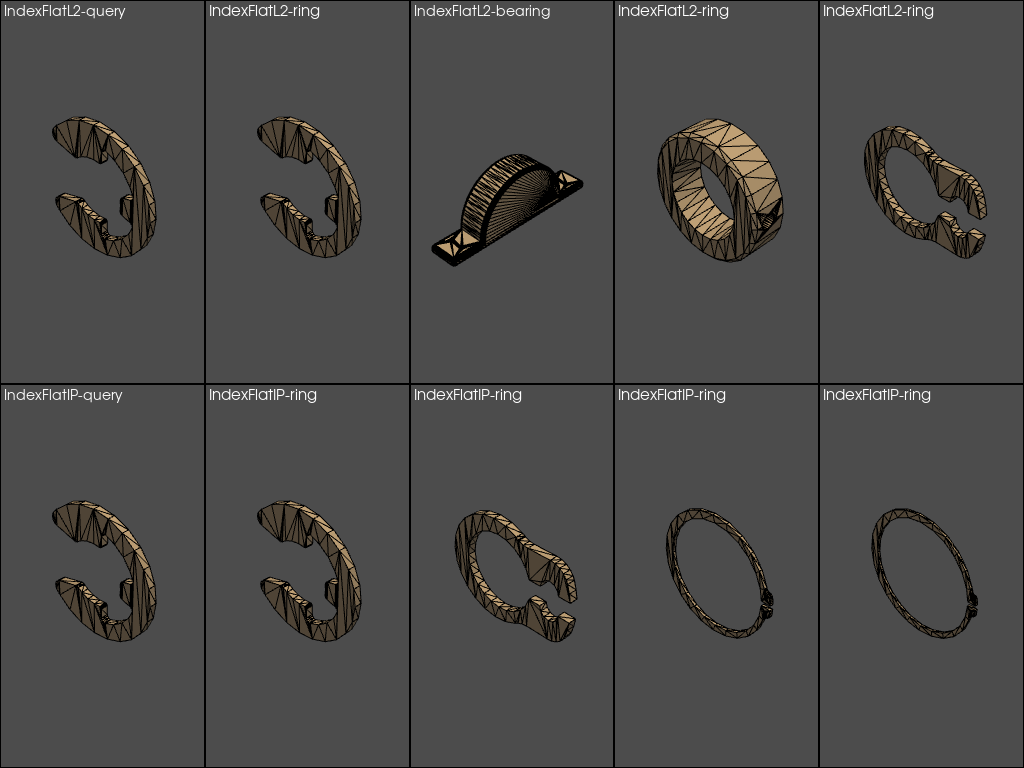

In [5]:
i = 0
query = dataset[i]
dist, ranked_list = retriever.retrive_one_example(model, query, dataset, fea_db)
retriever.show_results(i, ranked_list)


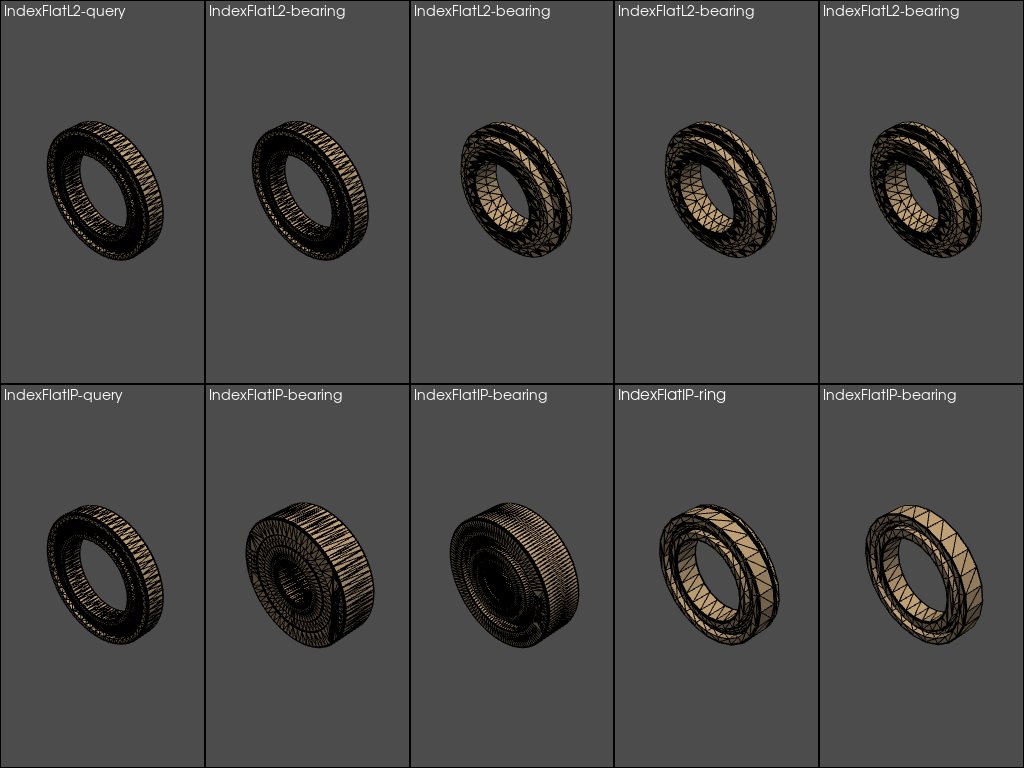

In [6]:
i = 50
query = dataset[i]
dist, ranked_list = retriever.retrive_one_example(model, query, dataset, fea_db)
retriever.show_results(i, ranked_list)

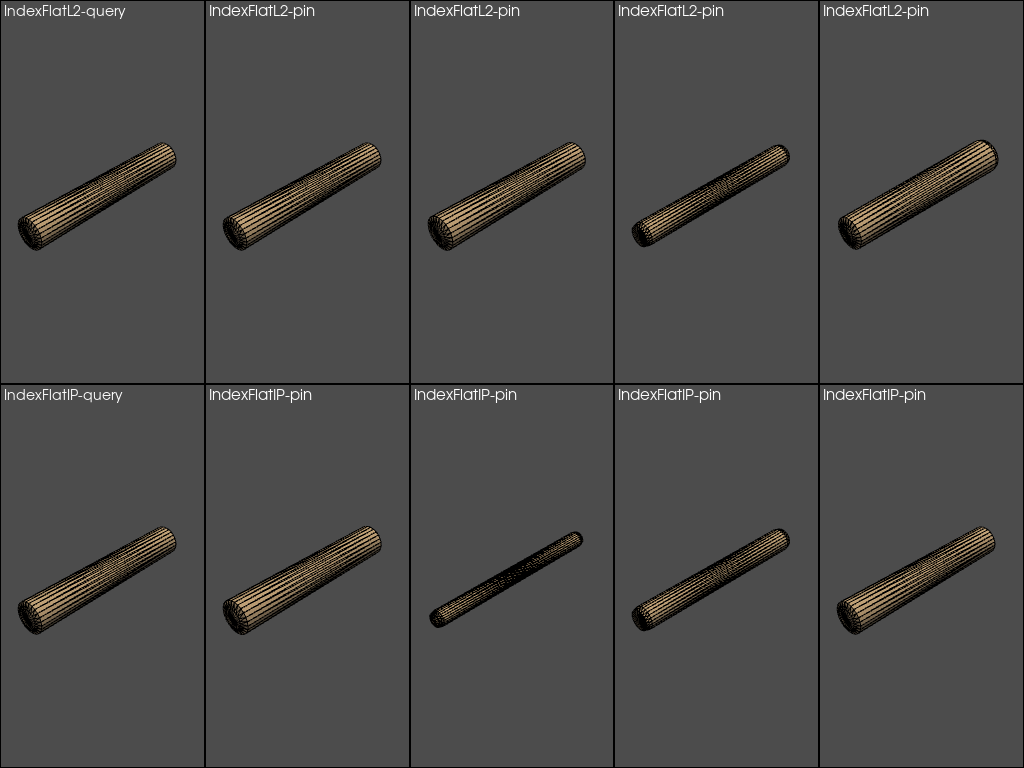

In [7]:
i = 100
query = dataset[i]
dist, ranked_list = retriever.retrive_one_example(model, query, dataset, fea_db)
retriever.show_results(i, ranked_list)

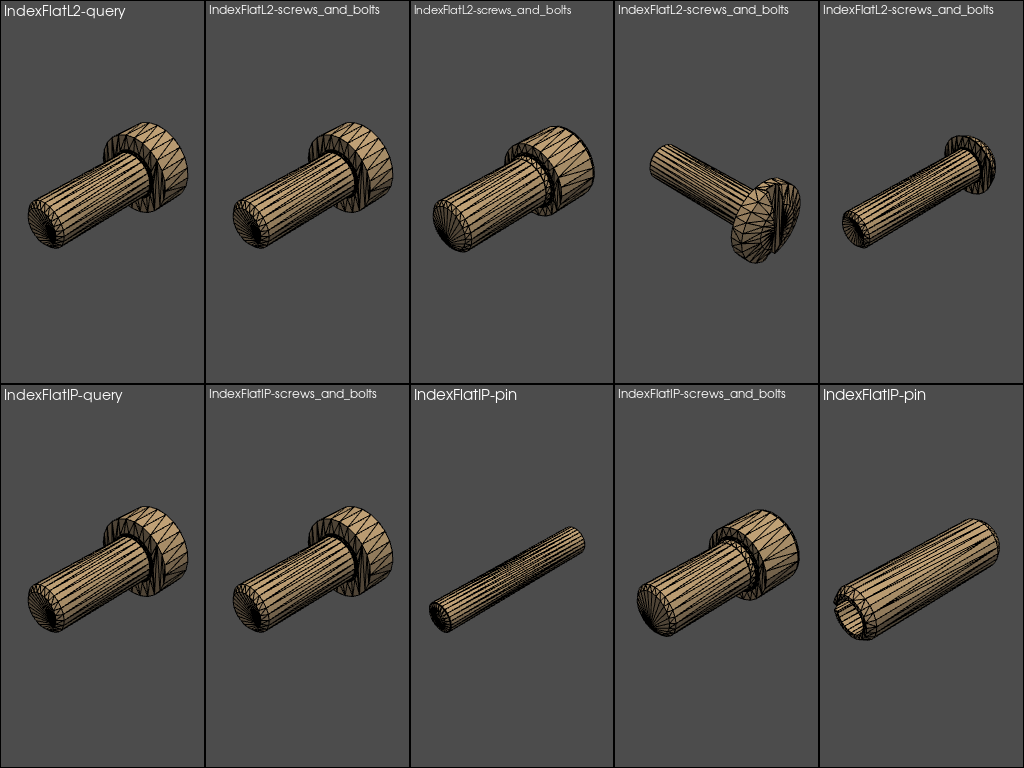

In [8]:
i = 150
query = dataset[i]
dist, ranked_list = retriever.retrive_one_example(model, query, dataset, fea_db)
retriever.show_results(i, ranked_list)